In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RTA Dataset.csv")
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [3]:
data.shape

(12316, 32)

In [4]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [8]:
data.duplicated().sum()

0

In [9]:
data['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

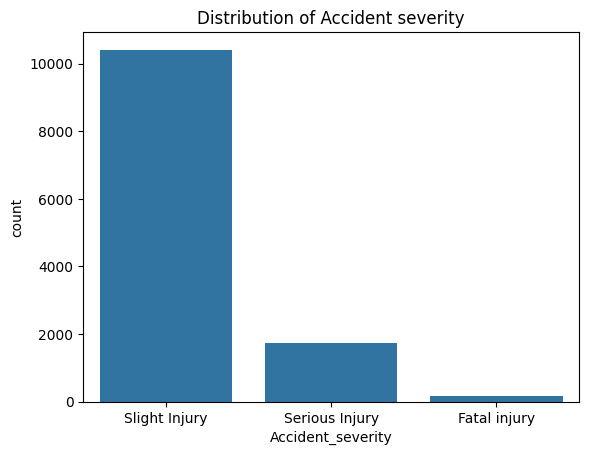

In [11]:
sns.countplot(x = data['Accident_severity'])
plt.title('Distribution of Accident severity')
plt.show()

In [13]:
missing_percentages = data.isna().sum().sort_values(ascending=False) / len(data)
missing_percentages.round(5)

Defect_of_vehicle              0.35945
Service_year_of_vehicle        0.31893
Work_of_casuality              0.25966
Fitness_of_casuality           0.21395
Type_of_vehicle                0.07714
Types_of_Junction              0.07202
Driving_experience             0.06731
Educational_level              0.06017
Vehicle_driver_relation        0.04701
Owner_of_vehicle               0.03914
Lanes_or_Medians               0.03126
Vehicle_movement               0.02501
Area_accident_occured          0.01941
Road_surface_type              0.01397
Type_of_collision              0.01259
Road_allignment                0.01153
Casualty_class                 0.00000
Pedestrian_movement            0.00000
Cause_of_accident              0.00000
Casualty_severity              0.00000
Age_band_of_casualty           0.00000
Sex_of_casualty                0.00000
Time                           0.00000
Road_surface_conditions        0.00000
Number_of_casualties           0.00000
Number_of_vehicles_involv

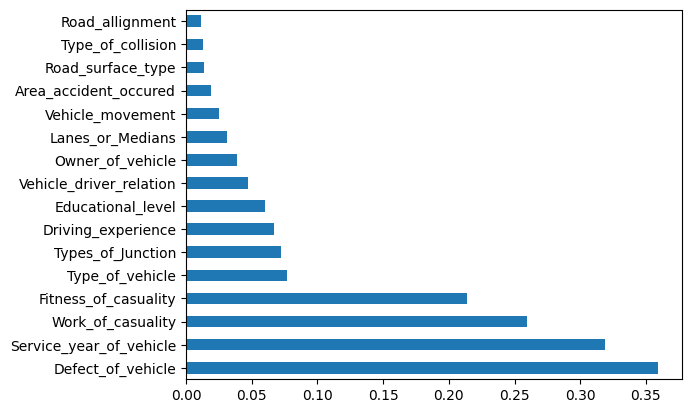

In [14]:
missing_percentages[missing_percentages!=0].plot(kind="barh")
plt.show()

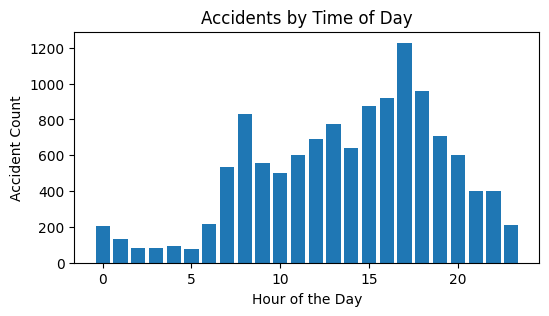

In [15]:
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
time_of_day_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(6,3))
plt.bar(time_of_day_counts.index, time_of_day_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Time of Day')
plt.show()

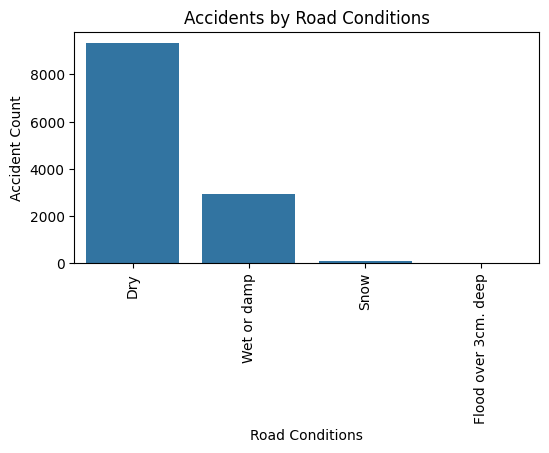

In [16]:
road_condition_counts = data['Road_surface_conditions'].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Road Conditions')
plt.ylabel('Accident Count')
plt.title('Accidents by Road Conditions')
plt.show()

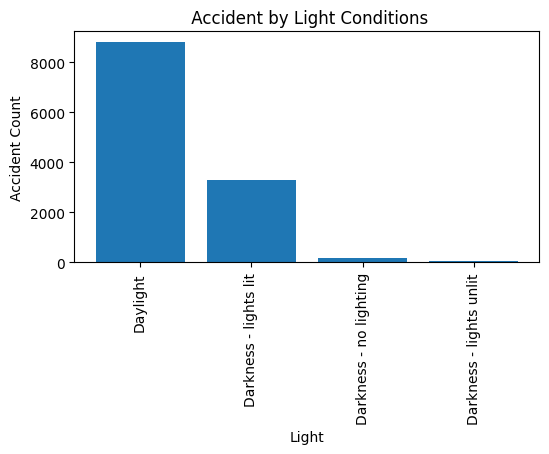

In [17]:
Light_count = data['Light_conditions'].value_counts()
plt.figure(figsize=(6,3))
plt.bar(Light_count.index, Light_count.values)
plt.xticks(rotation=90)
plt.xlabel('Light')
plt.ylabel('Accident Count')
plt.title(' Accident by Light Conditions')
plt.show()

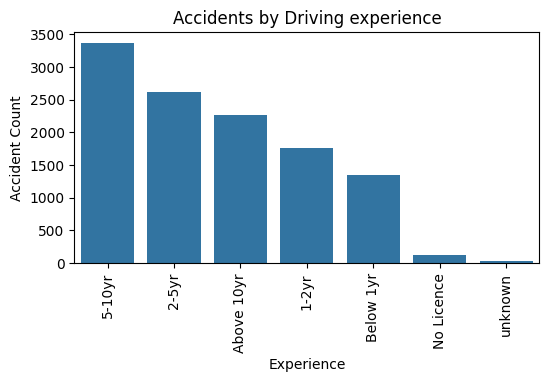

In [18]:
exp_counts = data['Driving_experience'].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=exp_counts.index, y=exp_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Experience')
plt.ylabel('Accident Count')
plt.title('Accidents by Driving experience')
plt.show()

Hour Frequency:
Time
0     0.016726
1     0.010880
2     0.006820
3     0.006820
4     0.007389
5     0.006171
6     0.017376
7     0.043196
8     0.067230
9     0.045388
10    0.040598
11    0.048961
12    0.056106
13    0.062683
14    0.051884
15    0.070965
16    0.074781
17    0.099708
18    0.077623
19    0.057486
20    0.049042
21    0.032559
22    0.032640
23    0.016970
Name: count, dtype: float64


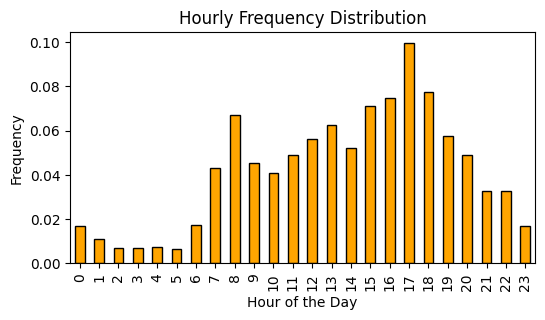

In [19]:
hour_frequency = data['Time'].dt.hour.value_counts().sort_index()
hour_frequency=hour_frequency/sum(hour_frequency)
plt.figure(figsize=(6,3))
print("Hour Frequency:")
print(hour_frequency)
hour_frequency.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Hourly Frequency Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

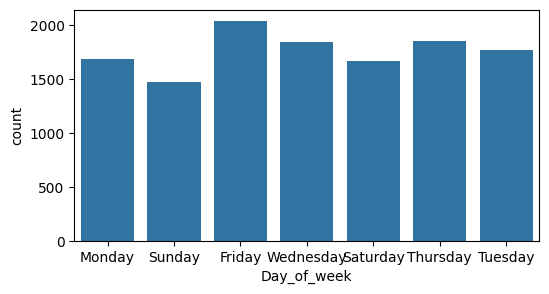

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(x="Day_of_week",data=data)
plt.xticks(rotation='horizontal')
plt.show()

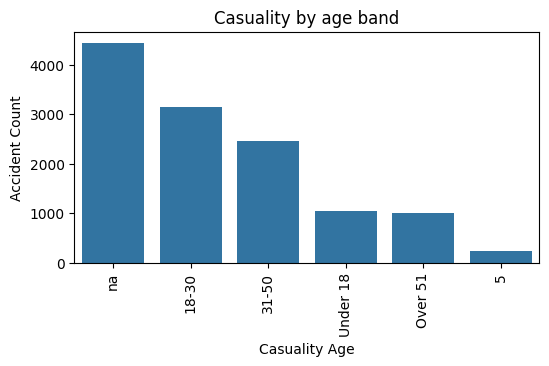

In [21]:
age_counts = data['Age_band_of_casualty'].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Casuality Age')
plt.ylabel('Accident Count')
plt.title('Casuality by age band')
plt.show()

In [23]:
b=data.loc[data['Age_band_of_driver'] !="Unknown", ['Age_band_of_driver', 'Accident_severity']]
b=((b.groupby(['Age_band_of_driver']).size()/data["Age_band_of_driver"].count())*100)
b

Age_band_of_driver
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Under 18     6.698603
dtype: float64

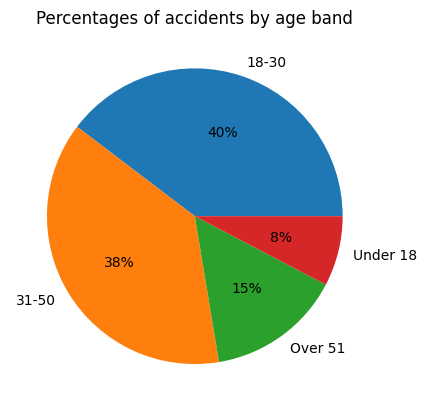

In [25]:
b.plot.pie(autopct='%1.0f%%', title='Percentages of accidents by age band')
plt.show()

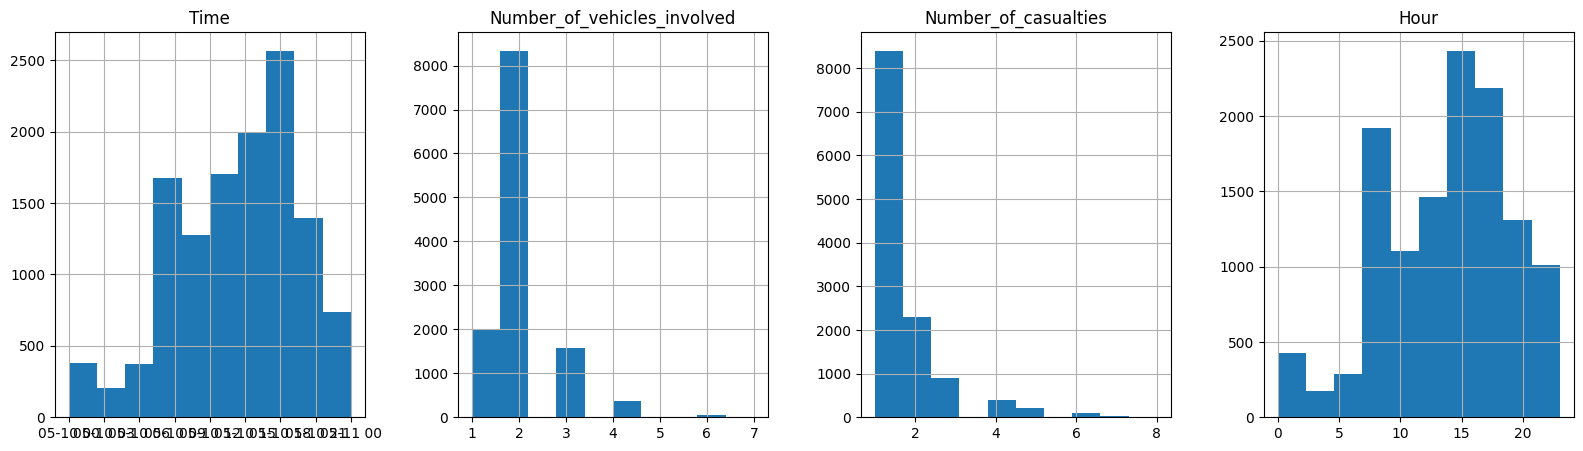

In [26]:
data.hist(layout=(1,6), figsize=(30,5))
plt.show()

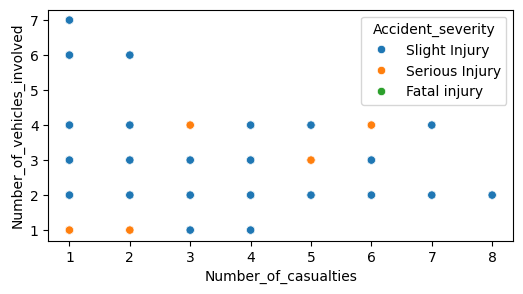

In [29]:
plt.figure(figsize=(6,3))
sns.scatterplot(x=data['Number_of_casualties'], y=data['Number_of_vehicles_involved'], hue=data['Accident_severity'])
plt.show()

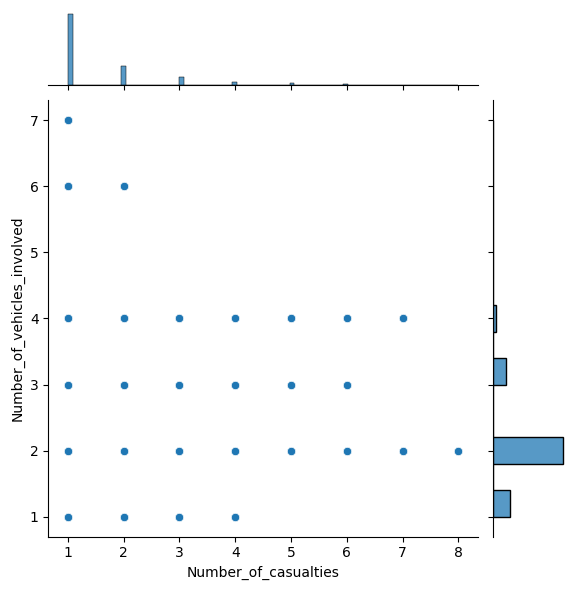

In [30]:
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=data)
plt.show()

In [34]:
numerical=[i for i in data.columns if data[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Time', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Hour']


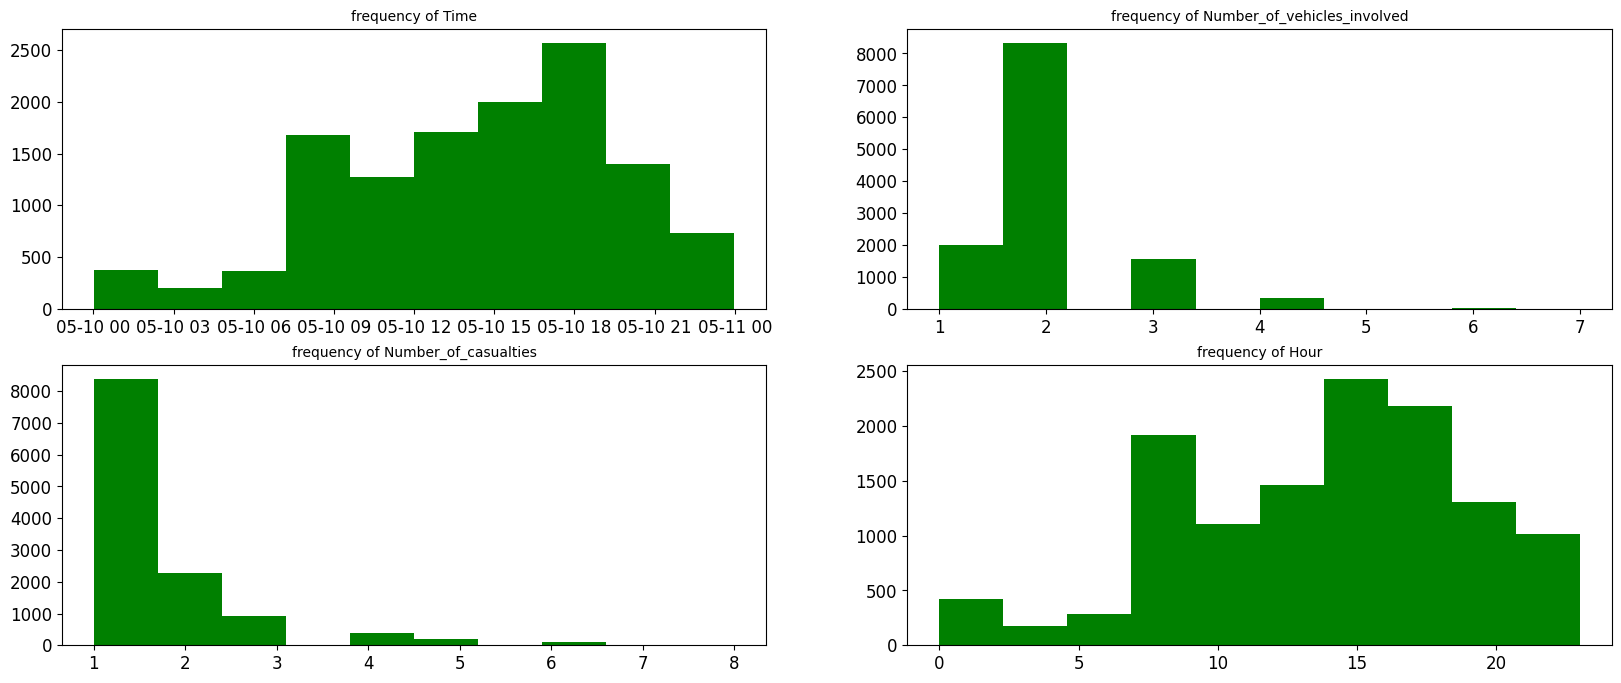

In [35]:
plt.figure(figsize=(20,8))
plotnumber = 1
for i in numerical:
    if plotnumber <= data.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(data[i],color='green')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1

In [37]:
data['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

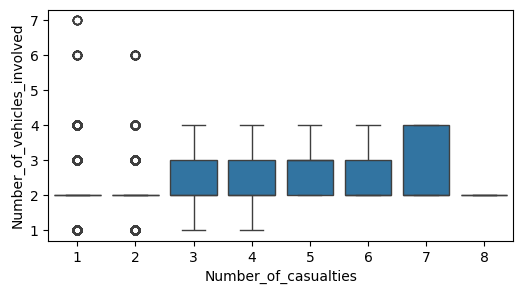

In [38]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

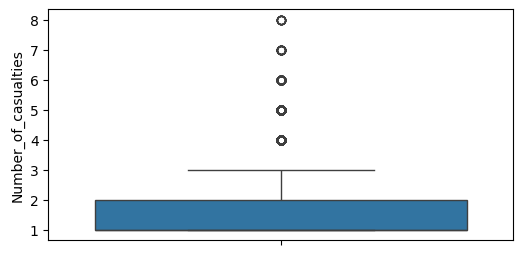

In [39]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data, y='Number_of_casualties')
plt.show()

In [40]:
data['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

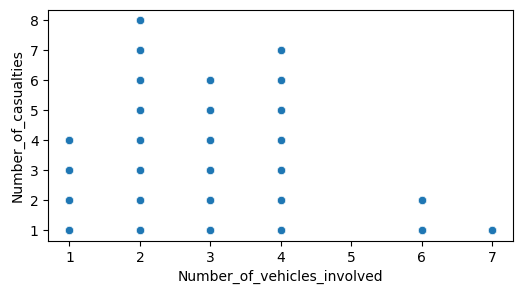

In [41]:
plt.figure(figsize=(6,3))
sns.scatterplot(x=data['Number_of_vehicles_involved'], y=data['Number_of_casualties'])
plt.show()

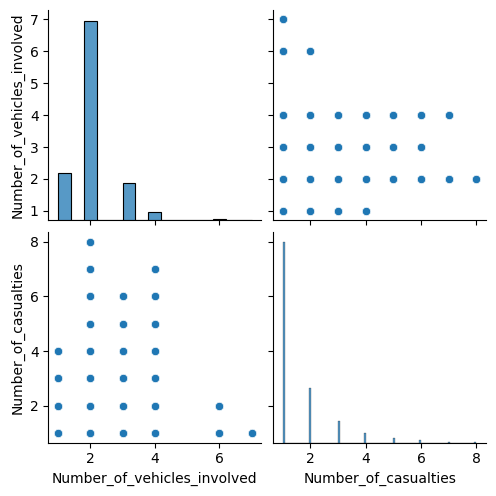

In [42]:
sns.pairplot(data[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

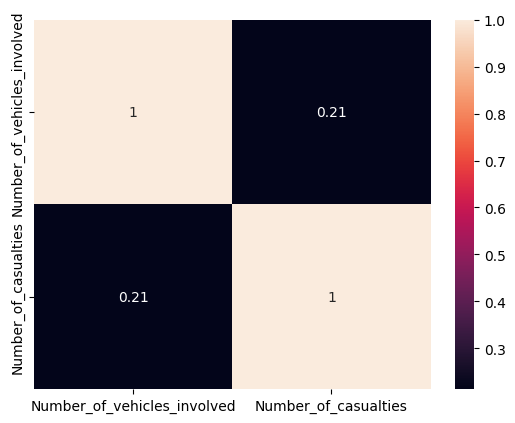

In [43]:
correlation_matrix = data[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

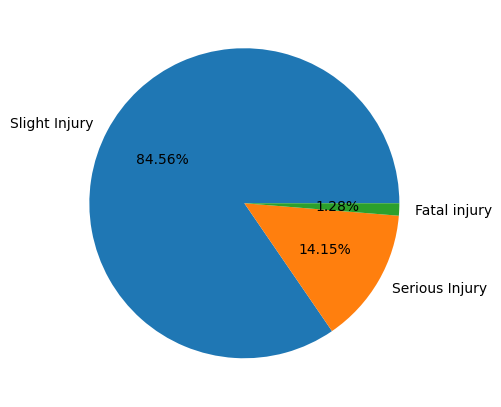

In [44]:
plt.figure(figsize=(5,6))
plt.pie(x=data['Accident_severity'].value_counts().values,
        labels=data['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

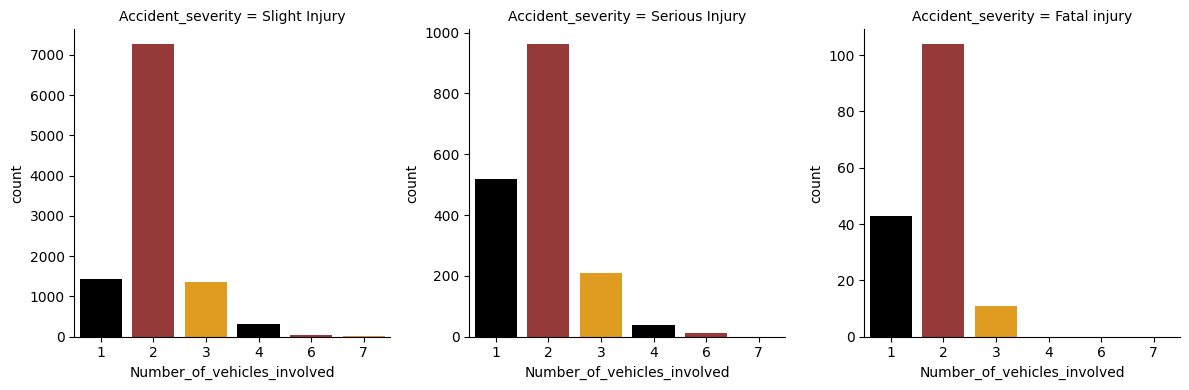

In [45]:
grid = sns.FacetGrid(data=data, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [46]:
((data.groupby(['Sex_of_driver']).size() / data["Sex_of_driver"].count()) * 100).add_prefix('Accidents Caused by ')

Sex_of_driver
Accidents Caused by Female      5.691783
Accidents Caused by Male       92.862943
Accidents Caused by Unknown     1.445274
dtype: float64

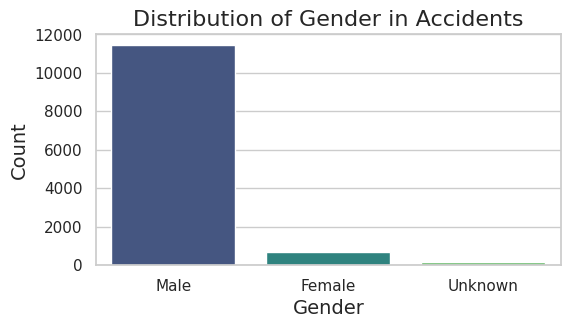

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,3))
sns.countplot(x='Sex_of_driver', data=data, palette='viridis')
plt.title('Distribution of Gender in Accidents', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

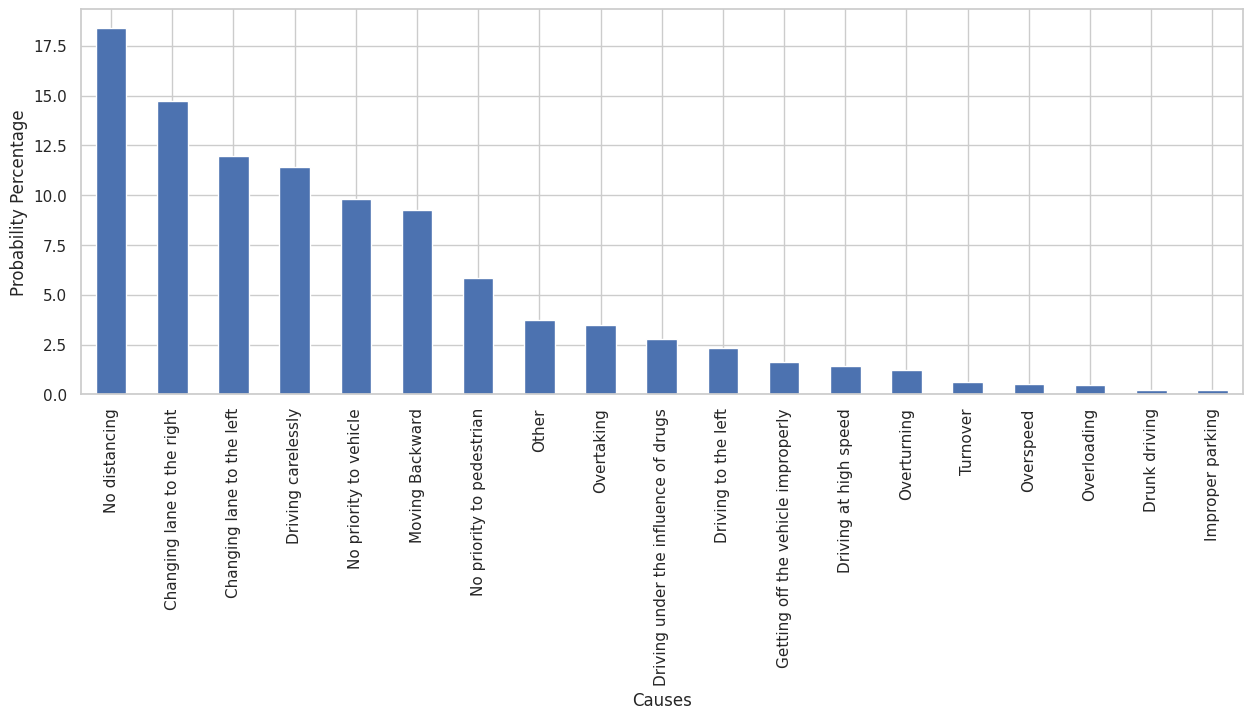

In [49]:
plt.figure(figsize =(15,5))
a= data.loc[data['Cause_of_accident'] !="Unknown"]
bar_plot=((a.groupby('Cause_of_accident')['Cause_of_accident'].count().sort_values(ascending=False)/a['Cause_of_accident'].count())*100).plot.bar()
bar_plot.set_ylabel("Probability Percentage")
bar_plot.set_xlabel("Causes")
plt.show()